In [3]:
import pandas as pd

In [8]:
df=pd.read_csv('flights.csv',low_memory=False)

In [9]:
df1=pd.DataFrame()

In [10]:
df1=df[:100000]

# New Section

In [11]:
df1.value_counts('DIVERTED')

DIVERTED
0.0    82565
1.0      189
dtype: int64

In [12]:
df2=df1.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','CANCELLATION_REASON'],axis=1)

In [13]:
correlations=df2.corr()

In [14]:
import seaborn as sns

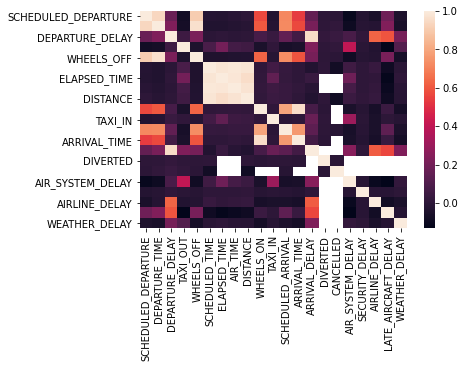

In [15]:
sns.heatmap(correlations)

In [16]:
df3=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis=1)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82755 entries, 0 to 82754
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                82755 non-null  int64  
 1   DAY                  82755 non-null  int64  
 2   ORIGIN_AIRPORT       82755 non-null  object 
 3   DESTINATION_AIRPORT  82755 non-null  object 
 4   SCHEDULED_DEPARTURE  82755 non-null  int64  
 5   DEPARTURE_DELAY      80751 non-null  float64
 6   SCHEDULED_ARRIVAL    82754 non-null  float64
 7   ARRIVAL_DELAY        80488 non-null  float64
 8   DIVERTED             82754 non-null  float64
 9   CANCELLED            82754 non-null  float64
 10  AIR_SYSTEM_DELAY     28760 non-null  float64
 11  SECURITY_DELAY       28760 non-null  float64
 12  AIRLINE_DELAY        28760 non-null  float64
 13  LATE_AIRCRAFT_DELAY  28760 non-null  float64
 14  WEATHER_DELAY        28760 non-null  float64
dtypes: float64(10), int64(3), object(2)


In [18]:
column_mean=df3.mean()

In [19]:
df4=pd.DataFrame()

In [21]:
df4=df3.fillna(column_mean)
print(column_mean)

MONTH                     1.000000
DAY                       3.193306
SCHEDULED_DEPARTURE    1312.838294
DEPARTURE_DELAY          19.873872
SCHEDULED_ARRIVAL      1484.133250
ARRIVAL_DELAY            18.347853
DIVERTED                  0.002284
CANCELLED                 0.025098
AIR_SYSTEM_DELAY         13.633067
SECURITY_DELAY            0.078929
AIRLINE_DELAY            18.219367
LATE_AIRCRAFT_DELAY      25.630563
WEATHER_DELAY             2.521036
dtype: float64


In [23]:
df4['RESULT']=0
df4.loc[df3['ARRIVAL_DELAY']>15,'RESULT']=1

In [24]:
df4['RESULT'].value_counts()

0    54851
1    27904
Name: RESULT, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

x=df4[['MONTH','DAY','SCHEDULED_DEPARTURE','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','DIVERTED','CANCELLED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]

y=df4['RESULT']

scaler=StandardScaler()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) 
x_train = scaler.fit_transform(x_train)

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
from sklearn.metrics import roc_auc_score

x_test = scaler.transform(x_test)
yhat = clf.predict(x_test)
print(roc_auc_score(yhat,y_test))

0.9967201859339034
